<a href="https://colab.research.google.com/github/fuadiub/Slope-Stability-Analysis/blob/main/Slope_Stability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

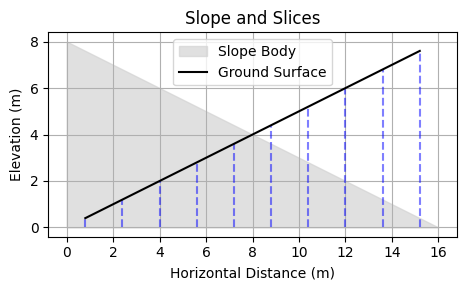

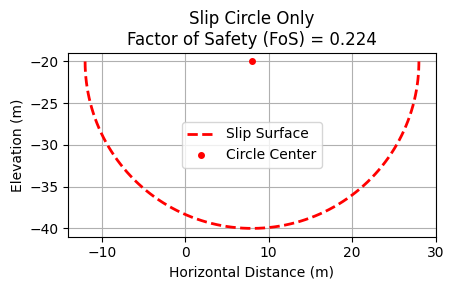

In [7]:
# Slope and soil parameters
H = 8               # slope height (m)
L = 16              # slope base length (m)
slices = 10         # number of slices
c = 15              # cohesion (kPa)
phi = 0             # internal friction angle (degrees)
gamma = 17          # unit weight of soil (kN/m³)
phi_rad = np.radians(phi)

# Slice geometry
dx = L / slices
x = np.linspace(dx/2, L - dx/2, slices)
z = (H / L) * x     # elevation at each slice (linear slope)

# Weight of each slice
area = z * dx
weight = area * gamma

# Slip circle parameters
R = 20
center_x = L / 2
center_y = -R

# Horizontal and vertical distance to center
x_rel = x - center_x
y_rel = z - center_y
alpha = np.arctan2(y_rel, x_rel)

# Bishop Simplified Iteration
FoS = 1.0
tolerance = 0.001
diff = 1
iteration = 0
max_iter = 100

while diff > tolerance and iteration < max_iter:
    numerator = np.sum((c * dx + weight * np.tan(phi_rad) * np.cos(alpha)) /
                       (1 + (np.tan(phi_rad) * np.tan(alpha)) / FoS))
    denominator = np.sum(weight * np.sin(alpha))
    FoS_new = numerator / denominator
    diff = abs(FoS_new - FoS)
    FoS = FoS_new
    iteration += 1

# ========================
# Plot 1: Slope and slices
# ========================
fig1, ax1 = plt.subplots(figsize=(6, 3))
ax1.fill_between([0, L], [0, 0], [H, 0], color='lightgrey', alpha=0.7, label='Slope Body')

# Slice lines
for i in range(slices):
    ax1.plot([x[i], x[i]], [0, z[i]], color='blue', linestyle='--', alpha=0.5)

# Surface profile
ax1.plot(x, z, 'k-', label='Ground Surface')

ax1.set_title("Slope and Slices")
ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Elevation (m)")
ax1.legend()
ax1.grid(True)
ax1.set_aspect('equal')
plt.tight_layout()
plt.show()

# ========================
# Plot 2: Slip circle
# ========================
fig2, ax2 = plt.subplots(figsize=(6, 3))

# Slip circle only
theta = np.linspace(np.pi, 2 * np.pi, 200)
x_circle = center_x + R * np.cos(theta)
y_circle = center_y + R * np.sin(theta)
ax2.plot(x_circle, y_circle, 'r--', linewidth=2, label='Slip Surface')

# Mark center of circle
ax2.plot(center_x, center_y, 'ro', markersize=4, label='Circle Center')

ax2.set_title(f"Slip Circle Only\nFactor of Safety (FoS) = {FoS:.3f}")
ax2.set_xlabel("Horizontal Distance (m)")
ax2.set_ylabel("Elevation (m)")
ax2.legend()
ax2.grid(True)
ax2.set_aspect('equal')
plt.tight_layout()
plt.show()
